In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato_df = pd.read_csv('zomato.csv',encoding= 'unicode_escape')
country_df = pd.read_excel('Country-Code.xlsx')

In [3]:
country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


# 1)	Merge the country sheet and Zomato file to get the country code

In [70]:
df = zomato_df.merge(country_df, on='Country Code', how='left')

# 2)	Get the Top rated restaurants in each city in India(On the basis of rating and votes).

In [5]:
top_rated = df[df['Country'] == 'India'].groupby(['City', 'Restaurant Name'], as_index=False).agg({'Aggregate rating':'max', 'Votes':'sum'})
top_rated = top_rated.sort_values(['Aggregate rating', 'Votes'], ascending=[False, False])
top_rated.head()

,City,Restaurant Name,Aggregate rating,Votes
1576,Kolkata,Barbeque Nation,4.9,7719
1477,Hyderabad,AB's - Absolute Barbecues,4.9,5634
1660,Mumbai,Mirchi And Mime,4.9,3244
4298,New Delhi,Naturals Ice Cream,4.9,3094
3499,New Delhi,Indian Accent - The Manor,4.9,1934


# 3)	Finding out relationship between the rating and votes.

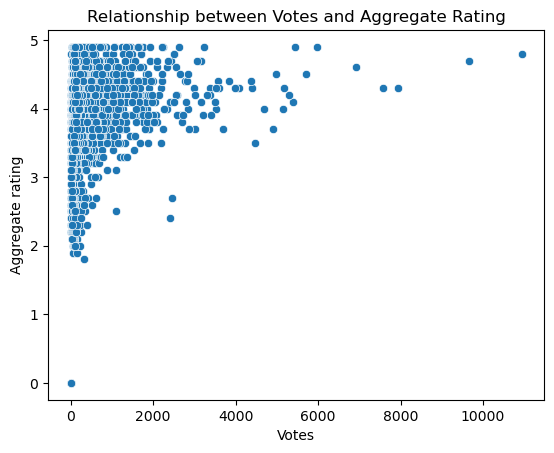

In [6]:
df[['Votes','Rating text']]
sns.scatterplot(data=df, x='Votes', y='Aggregate rating')
plt.title('Relationship between Votes and Aggregate Rating')
plt.show()

# 4)	No of Restaurants in each country.

In [7]:
temp = df['Country'].value_counts().reset_index()
temp.columns = ['Country', 'Count']

In [10]:
temp

,Country,Count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,UAE,60
5,South Africa,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


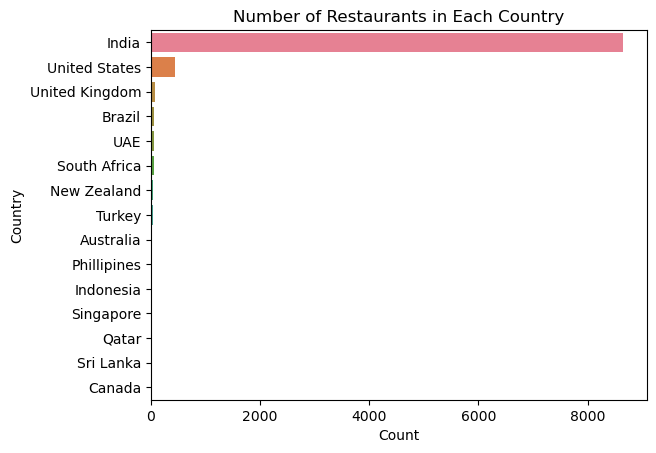

In [11]:
sns.barplot(data=temp, y='Country', x='Count', hue='Country', dodge=False, legend=False)
plt.title('Number of Restaurants in Each Country')
plt.show()

# 5)	Top 5 restaurants with online delivery

In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [13]:
df[df['Has Online delivery'] == 'Yes'].nlargest(5, 'Votes')[['Restaurant Name', 'Votes']]

,Restaurant Name,Votes
735,Truffles,9667
3994,Hauz Khas Social,7931
2412,Peter Cat,7574
743,Big Brewsky,5705
2411,BarBQ,5288


# 6)	Cheap but best restaurants available in a city

In [14]:
cheap_best_restaurants = df[df['Country'] == 'India'].sort_values(['City', 'Aggregate rating', 'Votes'], ascending=[True, False, False])
cheap_best_restaurants = cheap_best_restaurants.groupby('City').head(5)
cheap_best_restaurants[['City', 'Restaurant Name', 'Aggregate rating', 'Votes', 'Average Cost for two']]

,City,Restaurant Name,Aggregate rating,Votes,Average Cost for two
637,Agra,Sheroes Hangout,4.9,77,0
641,Agra,Pizza Hut,4.4,134,700
630,Agra,Peshawri - ITC Mughal,4.3,133,2500
628,Agra,Pinch Of Spice,4.2,177,1000
642,Agra,Tea'se Me - Rooftop Tea Boutique,4.2,166,1000
...,...,...,...,...,...
9262,Vizag,Barbeque Nation,4.9,345,1600
9256,Vizag,Pizza Hut,4.6,289,600
9275,Vizag,Flying Spaghetti Monster,4.4,316,1400
9259,Vizag,Mekong - Hotel GreenPark,4.4,73,1300


# 7) Top cuisines in each region.

In [15]:
top_cuisines = df.groupby(['City', 'Country', 'Cuisines']).size().reset_index(name='Counts')
top_cuisines = top_cuisines.sort_values(['City', 'Counts'], ascending=[True, False])
top_cuisines = top_cuisines.groupby('City').head(5)
top_cuisines

,City,Country,Cuisines,Counts
0,Abu Dhabi,UAE,American,2
7,Abu Dhabi,UAE,Indian,2
12,Abu Dhabi,UAE,"Italian, Pizza",2
1,Abu Dhabi,UAE,"American, Desserts",1
2,Abu Dhabi,UAE,"American, Mexican, Seafood",1
...,...,...,...,...
3015,ÛÁstanbul,Turkey,Cafe,3
3019,ÛÁstanbul,Turkey,Restaurant Cafe,2
3013,ÛÁstanbul,Turkey,Bar Food,1
3014,ÛÁstanbul,Turkey,"Burger, Izgara",1


# 8) Aggregate rating of all the restaurants in each city in a country.

In [72]:
agg_rating_city_country = df.groupby(['City', 'Country']).agg({'Aggregate rating':'mean'}).reset_index()
agg_rating_city_country = agg_rating_city_country.sort_values(['Country', 'Aggregate rating'], ascending=[True, False])
agg_rating_city_country

,City,Country,Aggregate rating
15,Beechworth,Australia,4.6
92,Palm Cove,Australia,4.4
126,Tanunda,Australia,4.4
41,East Ballina,Australia,4.1
53,Huskisson,Australia,4.1
...,...,...,...
80,Miller,United States,3.4
102,Potrero,United States,3.3
138,Winchester Bay,United States,3.2
28,Cochrane,United States,3.1


# 9) Does rating influence the cost of restaurant? (Draw boxplot for this).

      Restaurant ID           Restaurant Name  Country Code     City  \
9283        7402935                      Skye            94  Jakarta   
9284        7410290  Satoo - Hotel Shangri-La            94  Jakarta   

                                                Address  \
9283  Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...   
9284               Hotel Shangri-La, Jl. Jend. Sudirman   

                           Locality                        Locality Verbose  \
9283  Grand Indonesia Mall, Thamrin  Grand Indonesia Mall, Thamrin, Jakarta   
9284     Hotel Shangri-La, Sudirman     Hotel Shangri-La, Sudirman, Jakarta   

       Longitude  Latitude                    Cuisines  ...  \
9283  106.821999 -6.196778        Italian, Continental  ...   
9284  106.818961 -6.203292  Asian, Indonesian, Western  ...   

      Has Table booking Has Online delivery Is delivering now  \
9283                 No                  No                No   
9284                 No                  No    

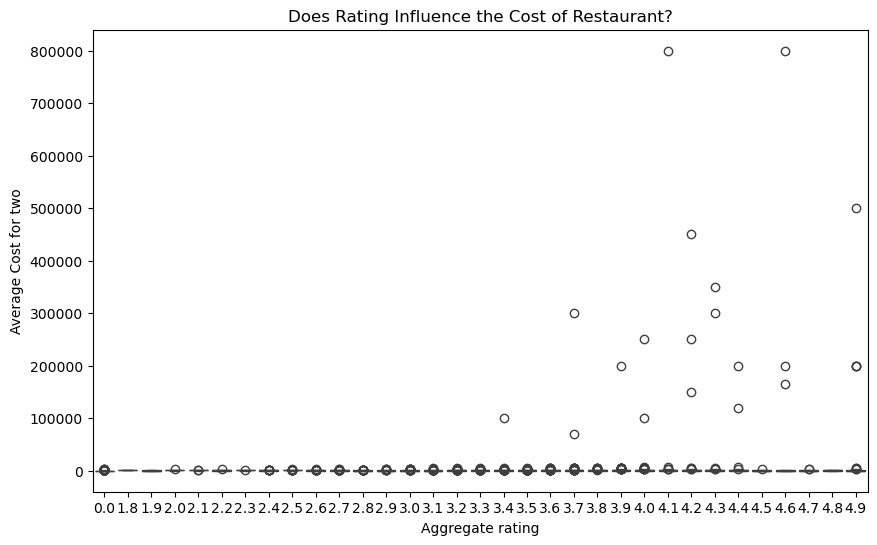

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Aggregate rating', y='Average Cost for two')
plt.title('Does Rating Influence the Cost of Restaurant?')
plt.show()

# 10) Top Percentage cover of restaurants in a city. (Draw pie graph for this).

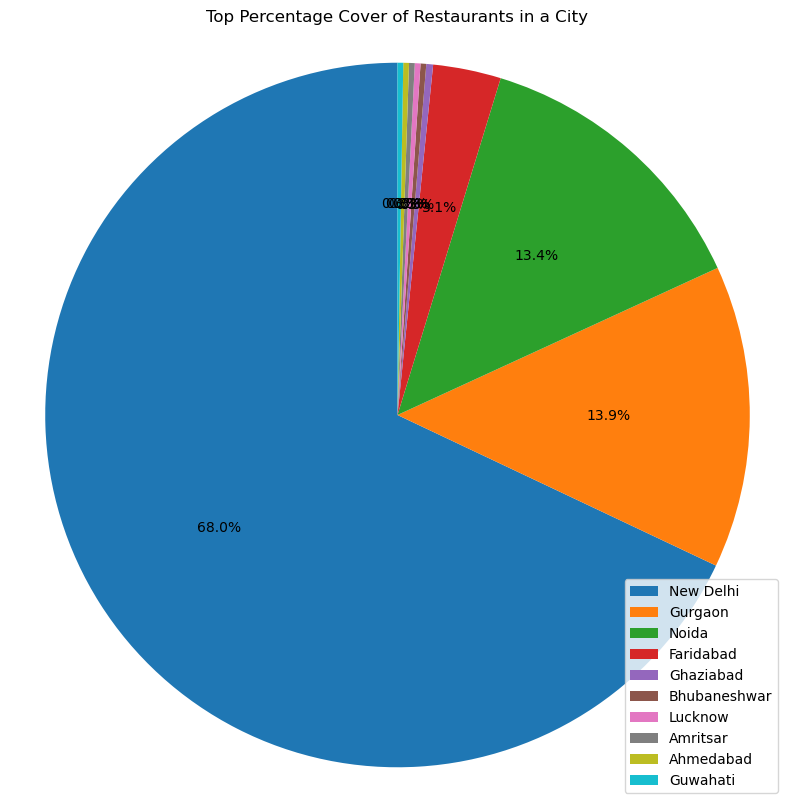

In [73]:
city_coverage = df.groupby('City').size().reset_index(name='Counts')
city_coverage = city_coverage.sort_values('Counts', ascending=False).head(10)
plt.figure(figsize=(10,10))
plt.pie(city_coverage['Counts'],autopct='%1.1f%%', startangle=90)
plt.title('Top Percentage Cover of Restaurants in a City')
plt.axis('equal')
plt.legend(labels=city_coverage['City'])
plt.show()

# 11) Top cuisines in Indian restaurants. (Draw pie graph for this)

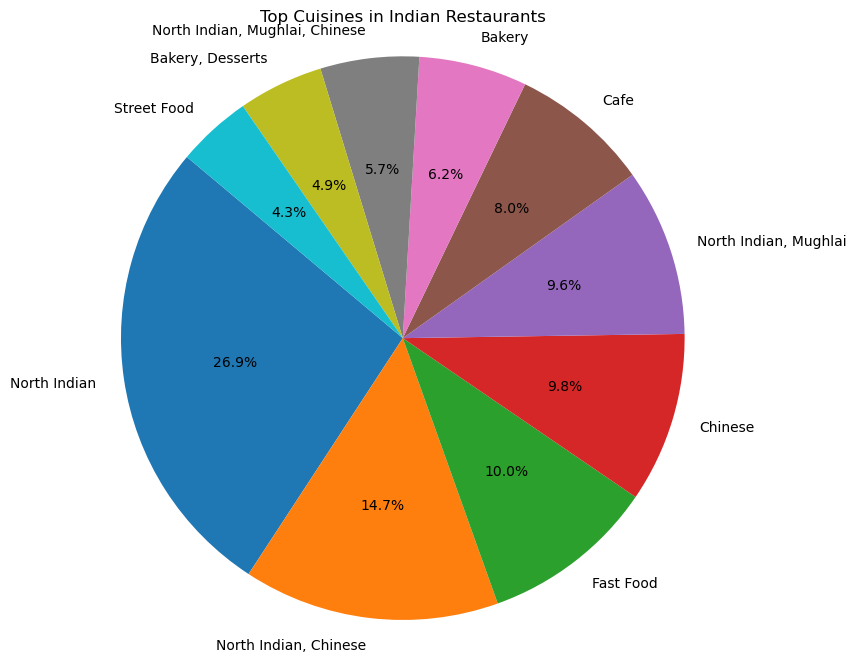

In [74]:
indian_cuisines = df[df['Country'] == 'India'].groupby('Cuisines').size().reset_index(name='Counts')
indian_cuisines = indian_cuisines.sort_values('Counts', ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(indian_cuisines['Counts'], labels=indian_cuisines['Cuisines'], autopct='%1.1f%%', startangle=140)
plt.title('Top Cuisines in Indian Restaurants')
plt.axis('equal')
plt.show()